In [45]:
import pennylane as qml
from pennylane.operation import Operation as q
from pennylane import numpy as np

In [46]:
class Order_Finding(Operation):
    
    num_params = 3
    num_wires = -1
    par_domain = None
    
    def expand(self):
        
        t = int(self.parameters[0])
        N = int(self.parameters[1])
        y = int(self.paramaters[2])
        n = int((len(self.wires)-2)/6)
        wires_x = self.wires[:n]
        wires_z = self.wires[n:2*n]
        wires_a = self.wires[2*n:3*n]
        wires_b = self.wires[3*n:4*n+1]
        wires_c = self.wires[4*n+1:5*n+1]
        wires_N = self.wires[5*n+1:6*n+1]
        wires_t = self.wires[-1]
        
        with qml.tape.QuantumTape() as tape:
            for i in range(t):
                qml.Hadamard(wires = wires_x[i])
                
            MODULAR_EXPONENTIATION(N, y, wires = wires_x + wires_z + wires_a + wires_b + wires_c + wires_N + [wires_t])
            
            QFT_inv(wires = wires_x)
        
        return tape
    

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/var/folders/yj/hd9lb5wn7ms2gf09wbjpmf_40000gn/T/ipykernel_19358/2043088277.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


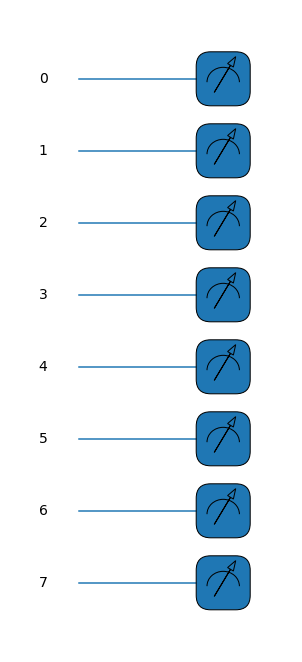

In [47]:
N = 5
y = 3
w_register = 3
x_register = 2*w_register + 2
wires = [i for i in range(x_register + w_register*5 + 2)]

dev = qml.device('default.qubit', wires = wires, shots = 1000)

@qml.qnode(dev)
def circuit():
    def func(N, y, x_register):
        for i in range(len(wires)):
            if wires[i] == 1:
                qml.PauliX(wires = wires[i])
    
        Order_Finding(N, y, x_register, wires = wires)
    
    return qml.sample(wires = range(0, 8))

circuit()
print(circuit())

fig, ax = qml.draw_mpl(circuit)()
fig.show()